In [116]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) 

In [117]:
import numpy as np

In [118]:
import h5py

In [138]:
# read in data
with h5py.File('eim-data.h5', 'r') as h5f:
    x = h5f['0'][:,0] # all data are on the same x-grid
    ys = np.zeros( shape=( len(h5f.keys()), len(x) ) )
    for k in h5f.keys():
        # need to do this becasuse dictionary keys are unordered list
        i = int(k)
        print(f"i={i}, k={k}")
        ys[i] = h5f[k][:,1]

i=0, k=0
i=1, k=1
i=10, k=10
i=2, k=2
i=3, k=3
i=4, k=4
i=5, k=5
i=6, k=6
i=7, k=7
i=8, k=8
i=9, k=9


In [139]:
plt.figure()
for y in ys:
    plt.scatter(x, y)
# plt.ylim(-5,5)

# polynomial interpolation w sklearn

In [140]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [141]:
X = x.reshape(-1, 1)
Xplot = np.linspace(x.min(), x.max(), 100)
Xplot = Xplot.reshape(-1, 1)

In [142]:
def fit_with_linear(eim_index, degrees=range(4)):
    plt.figure()
    plt.scatter(X, ys[eim_index])
    for degree in degrees:
#         model = make_pipeline(PolynomialFeatures(degree), Ridge())
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X, ys[eim_index])

        yhat = model.predict(Xplot)

        plt.plot(Xplot, yhat, label=f'degree = {degree}')

    plt.legend()
    plt.show()
    plt.close()

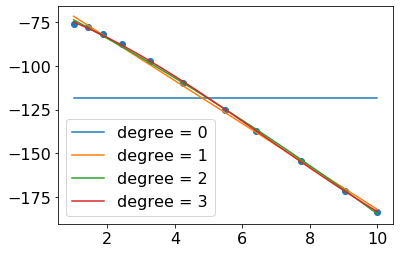

In [143]:
fit_with_linear(0)

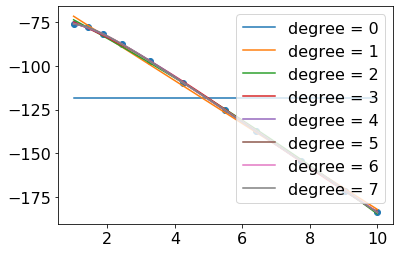

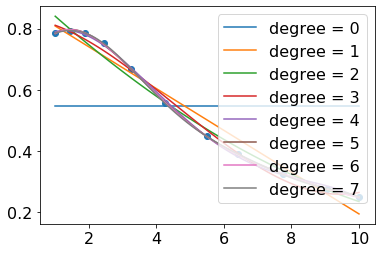

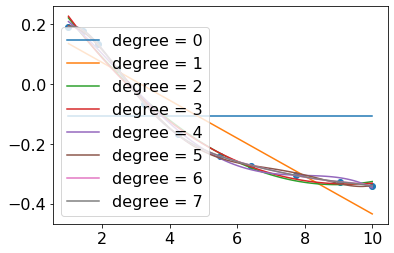

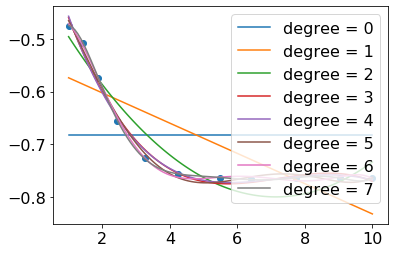

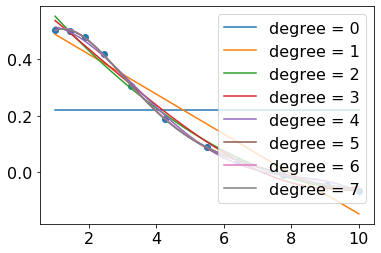

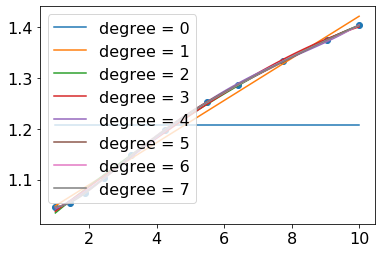

In [144]:
for i in range(len(ys)):
    fit_with_linear(i, degrees = range(8))

# grid search

In [145]:
from sklearn.model_selection import GridSearchCV


In [146]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {
    'polynomialfeatures__degree': np.arange(10),
    'linearregression__fit_intercept': [True, False],
    'linearregression__normalize': [True, False]}


poly_grid = GridSearchCV(PolynomialRegression(), param_grid, 
                         cv=10, 
                         scoring='neg_mean_squared_error', 
                         verbose=0) 

In [147]:
poly_grid.fit(X, ys[0])

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearr

In [148]:
model = poly_grid.best_estimator_
model.fit(X, ys[0])

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [149]:
yhat = model.predict(Xplot)

In [150]:
plt.figure()

plt.scatter(X, ys[0])
plt.plot(Xplot, yhat)

In [151]:
def fit_with_linear_grid_search(eim_index):


    def PolynomialRegression(degree=2, **kwargs):
        return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

    param_grid = {
        'polynomialfeatures__degree': np.arange(10),
        'linearregression__fit_intercept': [True, False],
        'linearregression__normalize': [True, False]}


    poly_grid = GridSearchCV(PolynomialRegression(), param_grid, 
                             cv=10, 
                             scoring='neg_mean_squared_error', 
                             verbose=0) 
    
    poly_grid.fit(X, ys[eim_index])
    model = poly_grid.best_estimator_
#     model.fit(X, ys[eim_index])
    yhat = model.predict(Xplot)
    
    best_degree = model.get_params('steps')['polynomialfeatures__degree']
    
    plt.figure()
    plt.scatter(X, ys[eim_index])

    plt.plot(Xplot, yhat, label=f'best degree = {best_degree}')

    plt.legend()
    plt.show()
    plt.close()

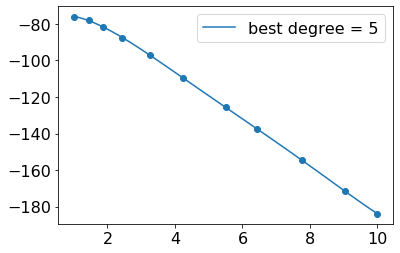

In [152]:
fit_with_linear_grid_search(0)

eim index = 0


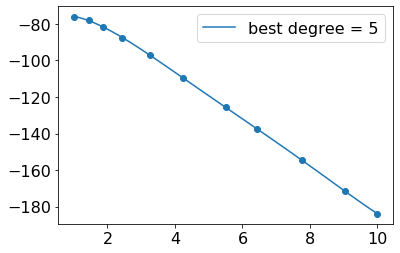

eim index = 1


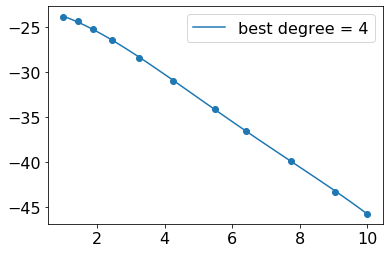

eim index = 2


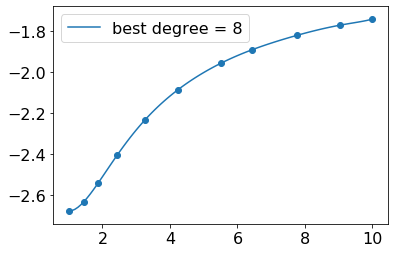

eim index = 3


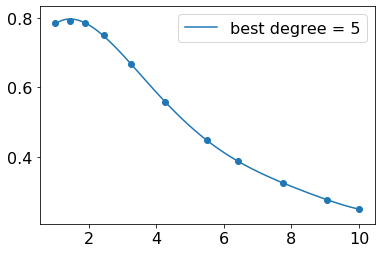

eim index = 4


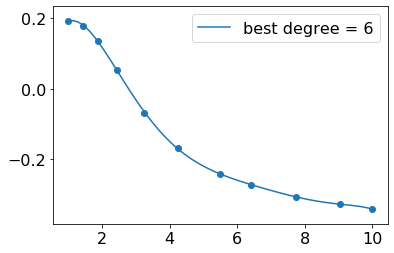

eim index = 5


eim index = 6


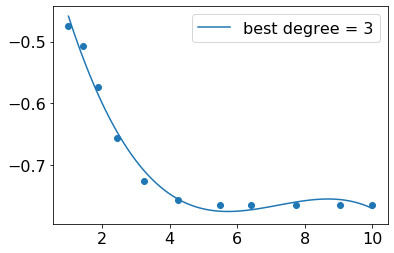

eim index = 7


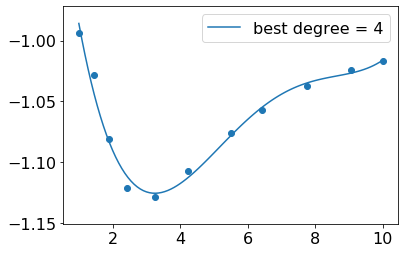

eim index = 8


eim index = 9


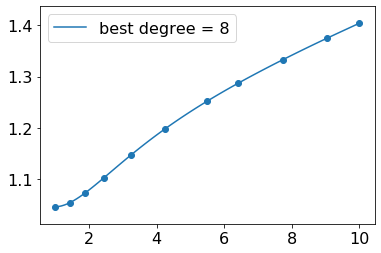

eim index = 10


In [153]:
for i in range(len(ys)):
    print(f"eim index = {i}")
    fit_with_linear_grid_search(i)